In [48]:
import csv
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

In [49]:
#TODO: Create animal class object that creates animal with properties
class Animal:
    def __init__(self, category='', scientific_name='', common_names='', park_name='', conservation_status='', observations=''):
        self.category = category
        self.scientific_name = scientific_name
        self.common_names = common_names
        self.conservation_status = conservation_status
        self.park_name = park_name
        self.observations = observations

    def get_category(self):
        return self.category

    def get_conservation_status(self):
        return self.conservation_status

    def get_observations(self):
        return self.observations



In [50]:
list_of_animals = []

# reading csv file to obtain attributes to create animal class
with open("observations.csv", 'r') as observations:
    with open("species_info.csv", 'r') as species_info:
        dict_reader_species = csv.DictReader(species_info)
        dict_reader_obsvr = csv.DictReader(observations)
        list_of_animals_counter = 0

        for row1 in dict_reader_species:
            list_of_animals.append(Animal(category=row1['category'], scientific_name=row1['scientific_name'], common_names=row1['common_names'], conservation_status=row1['conservation_status']))
            
            for row in dict_reader_obsvr:
                if row1['scientific_name'] == row['scientific_name']:
                    
                    list_of_animals[list_of_animals_counter].park_name = row['park_name']
                    list_of_animals[list_of_animals_counter].observations = row['observations']
                    list_of_animals_counter += 1
                    break



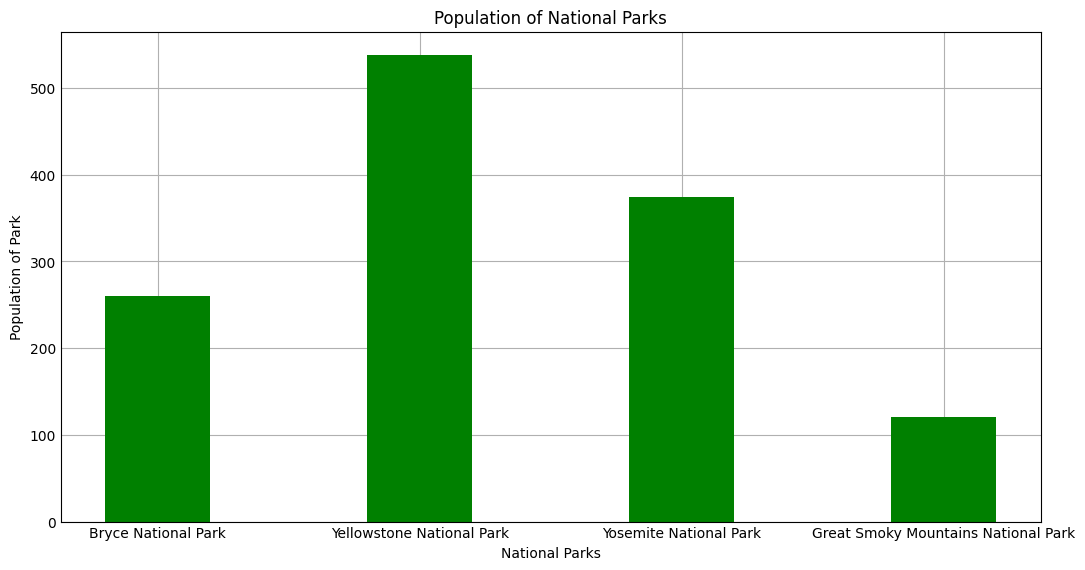

In [51]:
# 1) Conservation_Status by category
parks_and_pops = {}

#gets parks populations and adds them to the dictionary
for animal in list_of_animals:
    if animal.park_name not in parks_and_pops.keys() and animal.park_name != '' :
        parks_and_pops[animal.park_name] = int(animal.observations)
        

    if animal.park_name in parks_and_pops.keys() and animal.park_name != '':
        parks_and_pops[animal.park_name] += int(animal.observations)


#for creating bar graph
plt.style.use('_mpl-gallery')
x = parks_and_pops.keys()
y = parks_and_pops.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',width = 0.4)

plt.xlabel("National Parks")
plt.ylabel("Population of Park")
plt.title("Population of National Parks")
plt.show()

In [52]:
# 2) Coservation_Status by category per park
categories_of_animals = []
for animal in list_of_animals:
    if animal.category not in categories_of_animals and animal.category != '':
        categories_of_animals.append(animal.category)

for key in parks_and_pops.keys():
    parks_and_pops[key] = {'Mammal':0, 'Bird':0, 'Reptile':0, 'Amphibian':0, 'Fish':0, 'Vascular Plant':0, 'Nonvascular Plant':0}

for animal in list_of_animals:
    if animal.park_name in parks_and_pops.keys() and animal.park_name != '':
        parks_and_pops[animal.park_name][animal.category] += int(animal.observations)

parks = parks_and_pops.keys()
cat1 = parks_and_pops.values()

# fig = plt.figure(figsize = (10, 5))

# # creating the bar plot
# plt.bar(x, y, color ='green',width = 0.4)

# plt.xlabel("National Parks")
# plt.ylabel("Population of Park")
# plt.title("Population of National Parks")
# plt.show()

{'Bryce National Park': {'Mammal': 130, 'Bird': 0, 'Reptile': 0, 'Amphibian': 0, 'Fish': 0, 'Vascular Plant': 0, 'Nonvascular Plant': 0}, 'Yellowstone National Park': {'Mammal': 269, 'Bird': 0, 'Reptile': 0, 'Amphibian': 0, 'Fish': 0, 'Vascular Plant': 0, 'Nonvascular Plant': 0}, 'Yosemite National Park': {'Mammal': 250, 'Bird': 0, 'Reptile': 0, 'Amphibian': 0, 'Fish': 0, 'Vascular Plant': 0, 'Nonvascular Plant': 0}, 'Great Smoky Mountains National Park': {'Mammal': 60, 'Bird': 0, 'Reptile': 0, 'Amphibian': 0, 'Fish': 0, 'Vascular Plant': 0, 'Nonvascular Plant': 0}}


In [ ]:
# 3) Per park, populations of each category